## 12.1 Matplotlib 入門

In [ ]:
# Jupiter Notebook 要加這一個指令
%matplotlib inline

## 12.2 Matplotlib 的物件導向指南

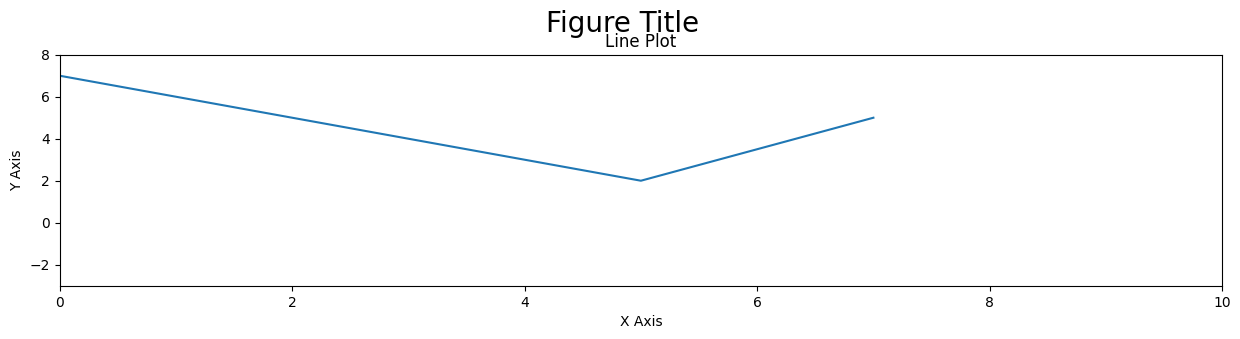

In [3]:
# stateful
import matplotlib.pyplot as plt
x = [-3, 5, 7]
y = [10, 2, 5]
fig = plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03);

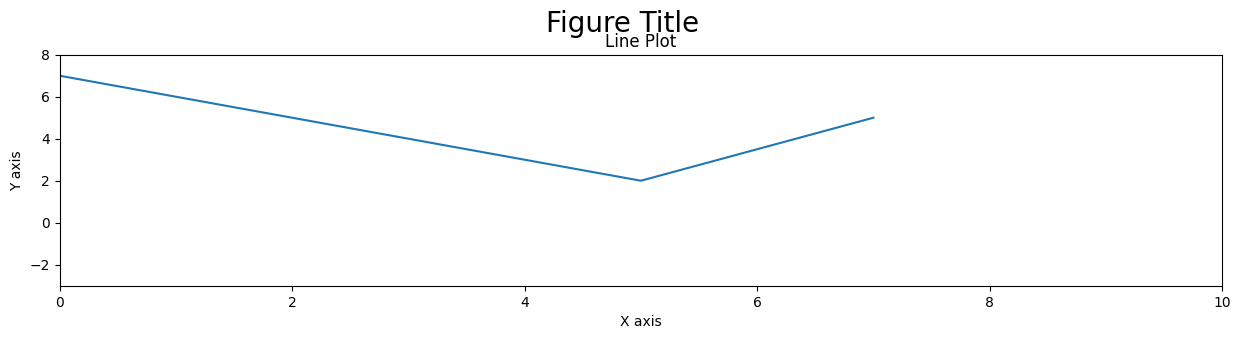

In [7]:
# object-oriented
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from IPython.display import display
fig = Figure(figsize=(15, 3))
FigureCanvas(fig)
ax = fig.add_subplot(1,1,1)

ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)
display(fig)

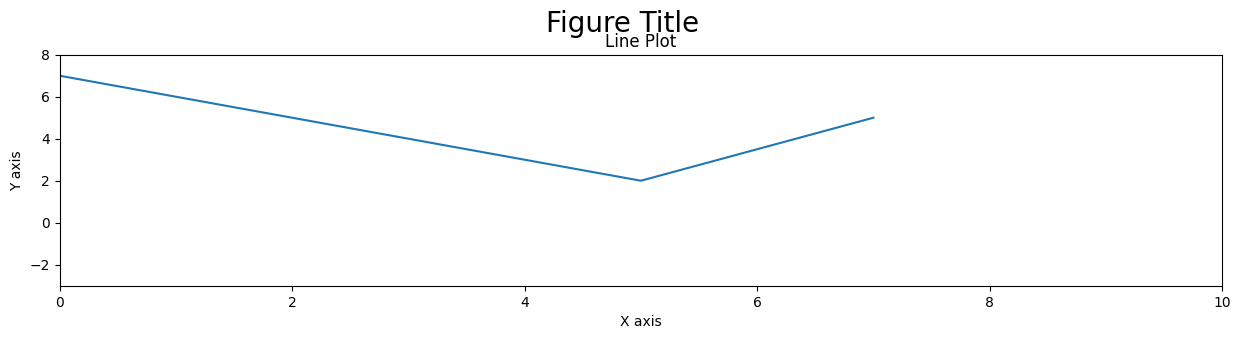

In [9]:
# 混合用法
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(x,y)
ax.set(xlim=(0,10), ylim=(-3, 8),
       xlabel='X axis', ylabel='Y axis',
       title='Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03);